# Load Imports and Data

In [24]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

from model.model import *
from model.plotting import *
from preprocess import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
pickle_data(preprocess(alldat, verbose = False))

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


# Preprocess Data
Preprocess data using the preprocessing function and split into train and test sets. Verbosity sets whether or not to print out at the end

In [11]:
train, test = train_test_split(load_processed_data())

Processed Data loaded


In [18]:
train.head(3).T

,0,1,2
session,0,0,0
session_type,train,train,train
mouse_name,Cori,Cori,Cori
trial_number,0,1,2
go_trial,True,True,True
gocue,1027.22,874.414,825.213
response_time,1150.2,1399.5,949.291
latency,122.987,525.089,124.078
mouse_resp,1,-1,1
wheel_velocity,"[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0...","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0..."


In [22]:
# Subsetting # 1
only_go = train[train['go_trial']][train['fut_go_trial']]

c:\users\xiw019\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## Change in Latency

In [21]:
# calculate new features
train['fut_lat_chg'] = train.apply(lambda row: row['fut_latency'] - row['latency'], axis=1)
train['mean_wheel_velocity'] = train['wheel_velocity'].apply(lambda x: np.mean(np.abs(x)))
train['diff_chg'] = train.apply(lambda row: (row['fut_difficulty'] - row['pres_difficulty']), axis=1)

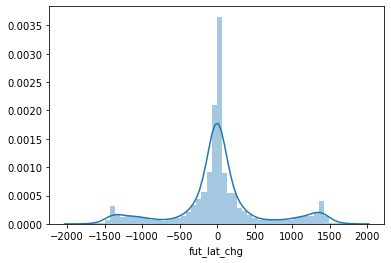

In [37]:
sns.distplot(only_go['fut_lat_chg'])

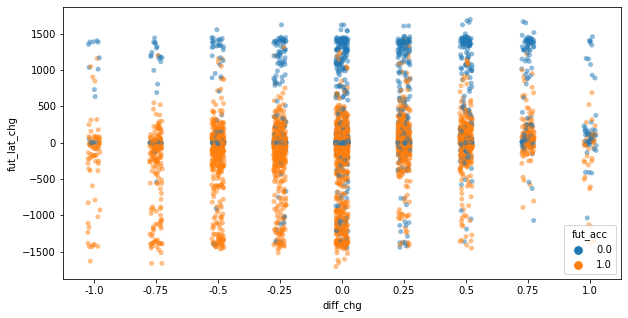

In [51]:
plt.figure(figsize=(10,5))
sns.stripplot(x='diff_chg', y='fut_lat_chg', hue='fut_acc', data=only_go, jitter=True, alpha = 0.5)

Able to split the trimodal distribution a little bit more, with future accuracy splitting the left bimodal and right bimodal. Difficulty is not helpful in splitting the distribution.

## Linear Regression

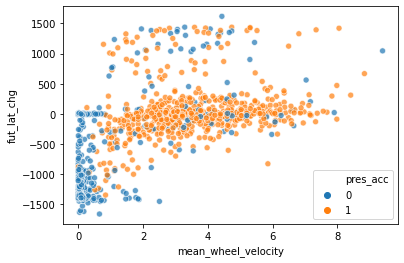

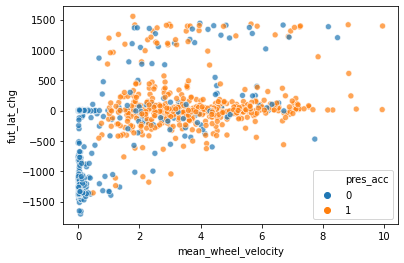

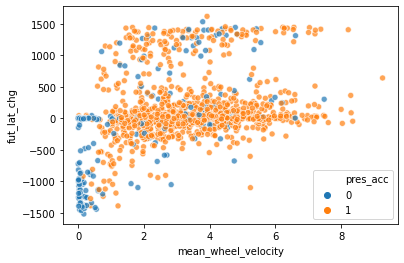

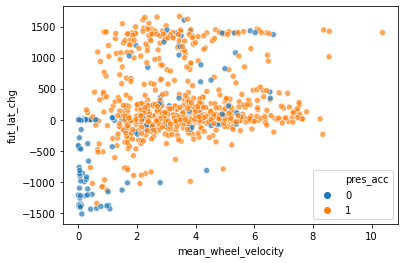

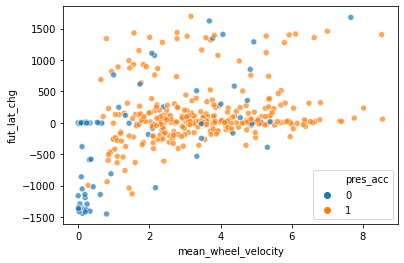

In [50]:
for i in np.arange(0, 1.25, 0.25):
    f = {"fut_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(train, y = "fut_lat_chg", features = ["mean_wheel_velocity"], filter_= f, hue = 'pres_acc')

In [54]:
train['go_trial']

0         True
1         True
2         True
3        False
4         True
         ...  
10045     True
10046     True
10047     True
10048     True
10049     True
Name: go_trial, Length: 7814, dtype: bool

In [55]:
data = train[train['go_trial']][train['fut_go_trial']]
data = data[['pres_acc', 'fut_lat_chg', 'mean_wheel_velocity']].dropna()
X = data[['pres_acc', 'mean_wheel_velocity']].to_numpy()
y = data[['fut_lat_chg']].to_numpy()
model = LinearRegression()
model.fit(X,y)

c:\users\xiw019\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
model.score(X,y)

0.16127215761471103

In [57]:
model.coef_

array([[169.09800247,  91.57995184]])

In [64]:
train

,session,session_type,mouse_name,trial_number,go_trial,gocue,response_time,latency,mouse_resp,wheel_velocity,...,past_latency,past_difficulty,fut_go_trial,fut_acc,fut_latency,fut_difficulty,fut_lat_chg,mean_wheel_velocity,perc_diff_chg,diff_chg
0,0.0,train,Cori,0.0,True,1027.216250,1150.203633,122.987383,1.0,"[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,NaN,NaN,True,1.0,525.089054,0.50,402.101672,4.760,0.998004,0.5
1,0.0,train,Cori,1.0,True,874.413814,1399.502868,525.089054,-1.0,"[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0...",...,122.987383,0.00,True,1.0,124.078016,0.50,-401.011038,3.672,0.000000,0.0
2,0.0,train,Cori,2.0,True,825.213029,949.291045,124.078016,1.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0...",...,525.089054,0.50,False,1.0,1505.189657,1.00,1381.111641,2.816,0.499500,0.5
3,0.0,train,Cori,3.0,False,761.612015,2266.801672,1505.189657,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",...,124.078016,0.50,True,0.0,154.765410,0.50,-1350.424247,0.868,-0.998004,-0.5
4,0.0,train,Cori,4.0,True,662.010427,816.775837,154.765410,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...",...,1505.189657,1.00,False,0.0,330.288154,1.00,175.522744,4.468,0.499500,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,38.0,train,Theiler,338.0,True,794.096687,2297.502777,1503.406090,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,1500.116592,0.75,True,0.0,634.103872,0.25,-869.302218,0.112,0.000000,0.0
10046,38.0,train,Theiler,339.0,True,524.699554,1158.803425,634.103872,-1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,1503.406090,0.25,True,0.0,1499.452065,0.25,865.348194,0.680,0.000000,0.0
10047,38.0,train,Theiler,340.0,True,504.256772,2003.708838,1499.452065,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 1.0,...",...,634.103872,0.25,True,0.0,1502.495204,0.25,3.043139,0.060,0.000000,0.0
10048,38.0,train,Theiler,341.0,True,574.262440,2076.757644,1502.495204,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,1499.452065,0.25,True,0.0,1511.308304,0.25,8.813100,0.040,0.000000,0.0


In [66]:
sns.scatterplot??

c:\users\xiw019\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


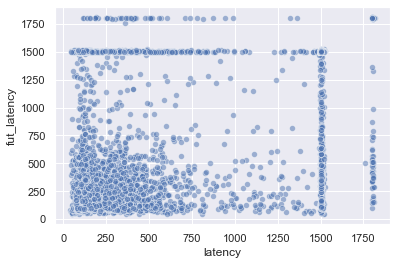

In [69]:
sns.scatterplot(x='latency', y='fut_latency', data = train[train['go_trial']][train['fut_go_trial']], alpha = .5)

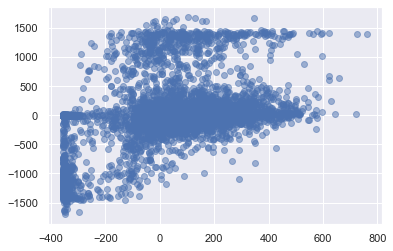

In [62]:
plt.scatter(model.predict(X), y, alpha=.5)

## Controlled Subset

In [104]:
train = train[train['go_trial']][train['fut_go_trial']]

In [105]:
train = train[train['pres_difficulty'] != 1]

In [108]:
train['mean_wheel_velocity'] = train['wheel_velocity'].apply(lambda x: np.mean(np.abs(x)))

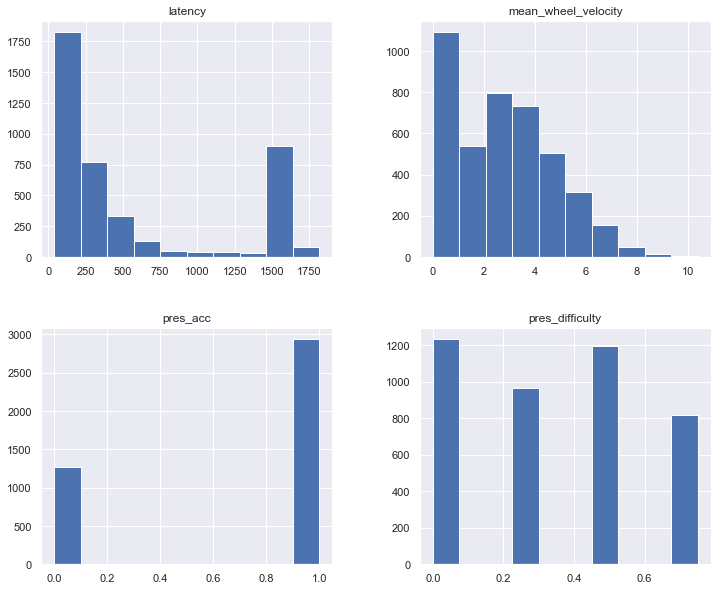

In [109]:
train[['latency', 'pres_acc', 'pres_difficulty', 'mean_wheel_velocity']].hist(figsize = (12,10));

In [110]:
def paired_trial(df):
    return df[df['pres_difficulty'] == df['fut_difficulty']]

In [111]:
df_paired = paired_trial(train)

In [124]:
df_paired[(df_paired['latency'] > 1500) & (df_paired['feedback_type'] == -1)]

,session,session_type,mouse_name,trial_number,go_trial,gocue,response_time,latency,mouse_resp,wheel_velocity,...,pres_acc,response_time_diff,past_acc,past_latency,past_difficulty,fut_go_trial,fut_acc,fut_latency,fut_difficulty,mean_wheel_velocity
80,0.0,train,Cori,80.0,True,658.410370,2162.959168,1504.548798,0.0,"[-1.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0...",...,0,-1.211174,1.0,1510.412041,1.00,True,0.0,407.376449,0.25,0.352
93,0.0,train,Cori,93.0,True,1094.017315,2602.629848,1508.612533,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,-1.267518,1.0,396.011143,0.50,True,1.0,473.498306,0.50,1.608
97,0.0,train,Cori,97.0,True,535.208406,2036.579848,1501.371443,0.0,"[4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 0.0, ...",...,0,-1.001087,1.0,520.345128,0.00,True,0.0,392.682671,0.25,0.192
99,0.0,train,Cori,99.0,True,569.208948,2082.616460,1513.407512,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,-0.614082,0.0,392.682671,0.25,True,1.0,346.916233,0.25,0.124
103,0.0,train,Cori,103.0,True,1069.616926,2575.256212,1505.639286,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",...,0,-0.157689,1.0,84.435462,0.00,True,1.0,1410.351106,0.00,0.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,38.0,train,Theiler,275.0,True,614.284605,2116.162812,1501.878206,0.0,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0,...",...,0,-1.137138,1.0,112.721623,0.00,True,1.0,343.323694,0.75,1.020
10030,38.0,train,Theiler,323.0,True,618.153071,2118.393948,1500.240877,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...",...,0,0.094991,0.0,1519.229634,0.50,True,0.0,1500.195462,0.00,0.088
10031,38.0,train,Theiler,324.0,True,713.189163,2213.384625,1500.195462,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,-0.557737,0.0,1500.240877,0.00,True,0.0,1051.392490,0.00,0.048
10045,38.0,train,Theiler,338.0,True,794.096687,2297.502777,1503.406090,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,-1.138699,0.0,1500.116592,0.75,True,0.0,634.103872,0.25,0.112


In [126]:
import scipy.signal

In [127]:
xx = train['latency'].to_numpy()
corrs = sp.signal.correlate(xx,xx)

(3000.0, 6000.0)

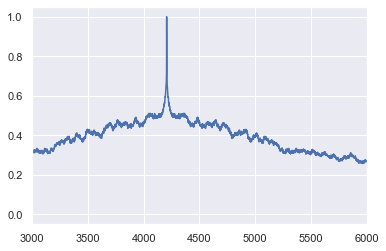

In [131]:
plt.plot(corrs/np.max(corrs))
plt.xlim([3000,6000])

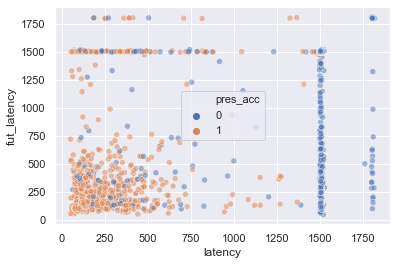

In [113]:
sns.scatterplot(x='latency', y='fut_latency', data = df_paired, alpha = .5, hue='pres_acc')

# Plot
Plot, like, everything. But not everything. Just some things.


In [55]:
print(train["go_trial"])

0         True
1         True
2         True
3        False
4         True
         ...  
10045     True
10046     True
10047     True
10048     True
10049     True
Name: go_trial, Length: 7814, dtype: bool


In [56]:
min(train["contrast_right"])

0.0

In [8]:
import seaborn as sns
sns.set()
def plots(df, y = "fut_latency", features = ["pres_acc", "fut_latency"], filter_: dict= None, hue = None):
    if filter_ is not None: 
        for key in filter_.keys(): 
            df = df[df[key] == filter_[key]]

    for feature in features:
        if df[feature].dtype in [float, int]:
            if len(list(set(df[feature].dropna()))) < 10:
                plt.figure()
                sns.violinplot(df[feature], df[y])  
                plt.xlabel(feature)
                plt.ylabel(y)
            else: 
                plt.figure()
                sns.scatterplot(feature, y, data = df, hue=hue, alpha= 0.7)
                plt.xlabel(feature)
                plt.ylabel(y)

                
def histograms(df, x, by: str, filter_:dict = None, title = None):
    if filter_ is not None: 
        for key in filter_.keys(): 
            df = df[df[key] == filter_[key]]
    
    plt.figure()
    for val in set(df[by]):
        plt.hist(x = x, data = df[df[by]==val], density = True, alpha = 0.7, label = "%s: %s"%(by, val), bins = 15)
        plt.xlabel(x)
    
    plt.legend()
    plt.title(title)

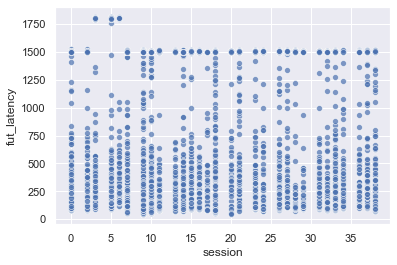

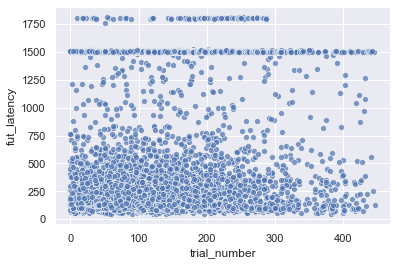

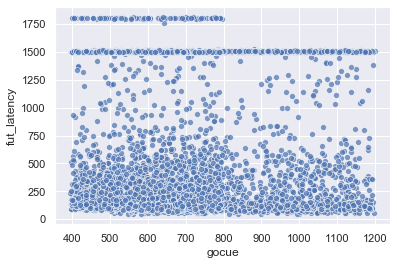

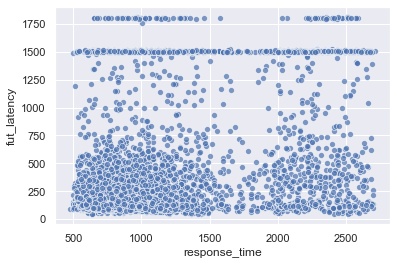

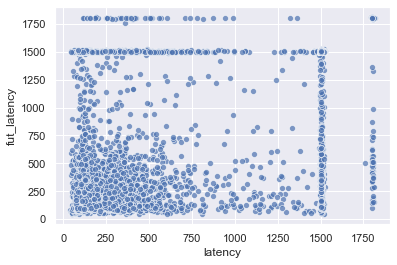

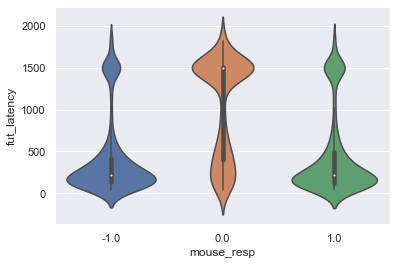

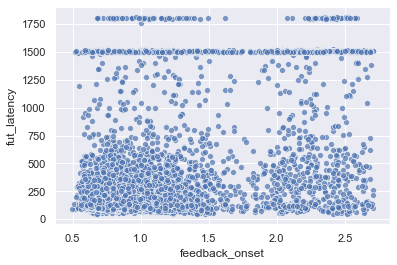

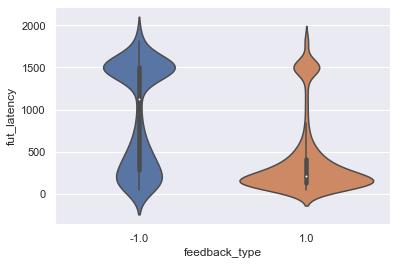

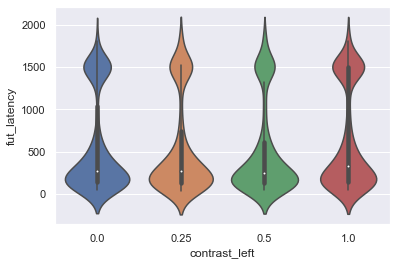

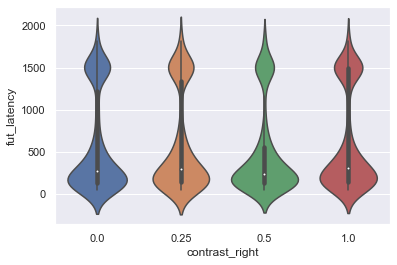

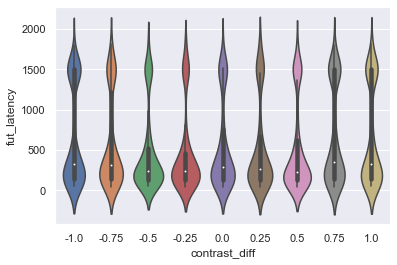

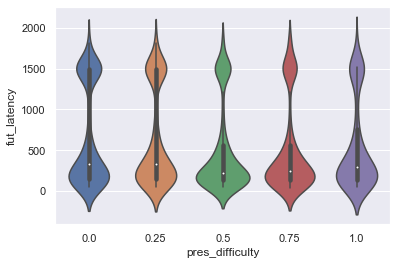

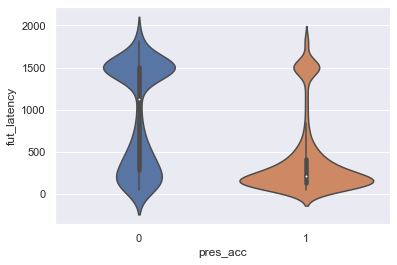

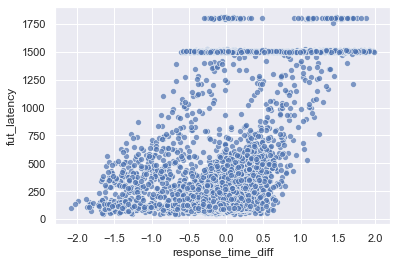

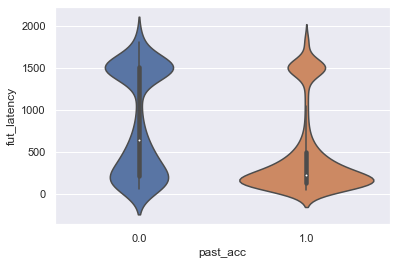

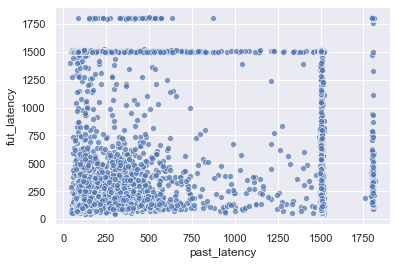

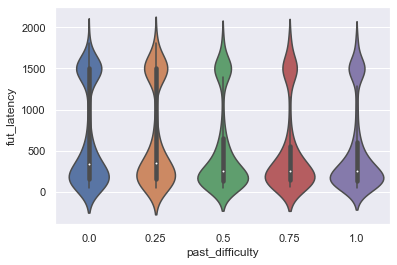

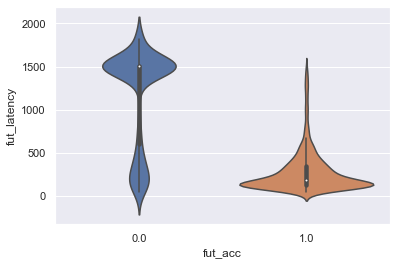

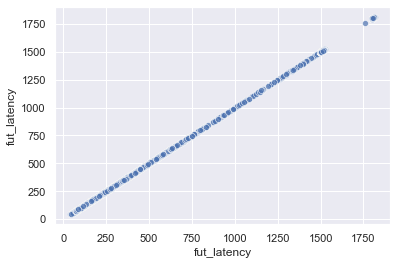

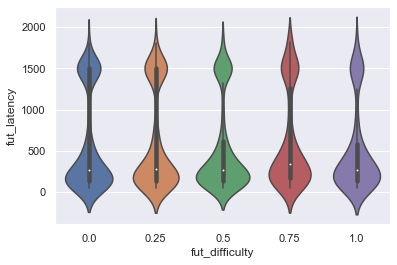

In [70]:
f = {"go_trial": True, "fut_go_trial": True}
plots(train, features=train.columns, filter_= f)

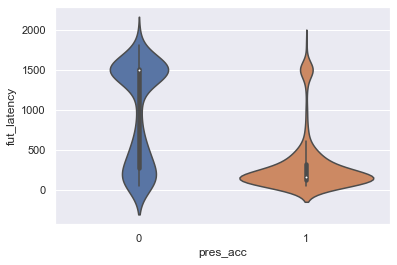

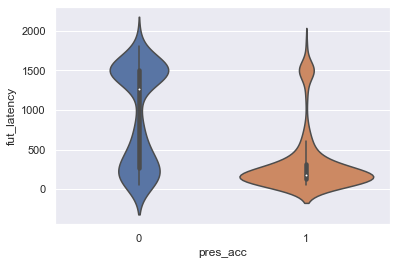

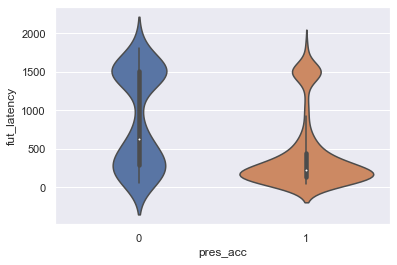

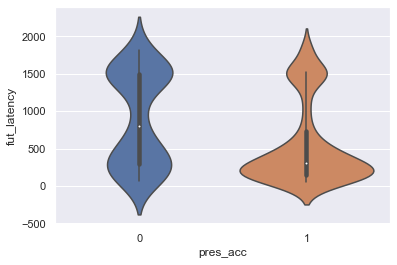

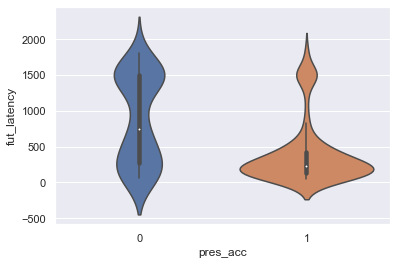

In [59]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    f = {"fut_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(train, y = "fut_latency", features = ["pres_acc"], filter_ = f)

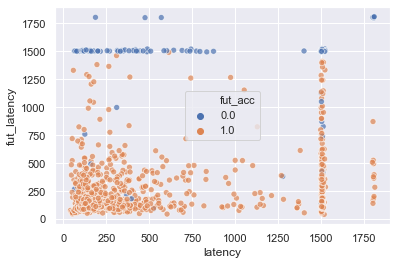

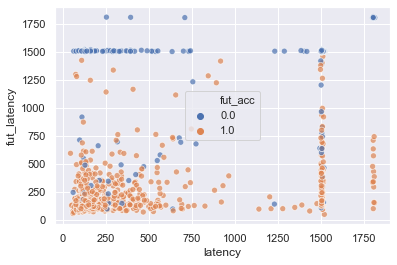

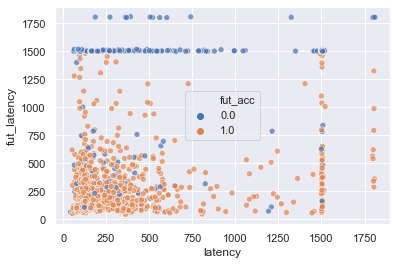

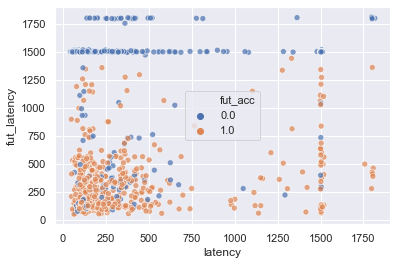

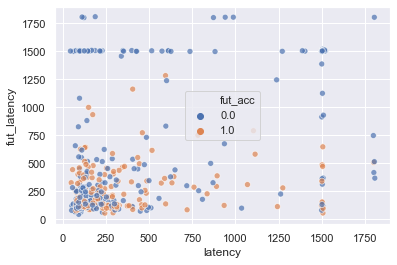

In [72]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    f = {"fut_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(train, y= "fut_latency", features = ["latency"], filter_= f, hue= "fut_acc")

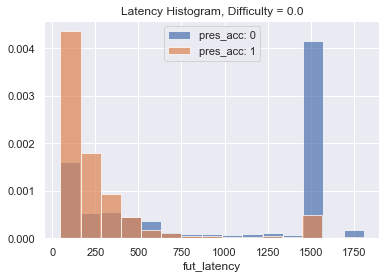

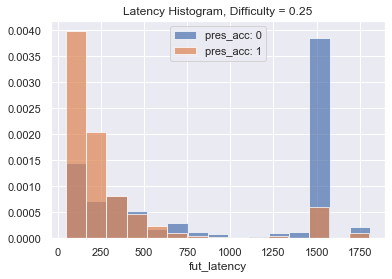

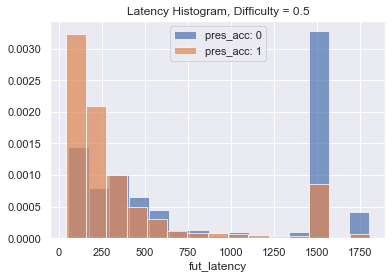

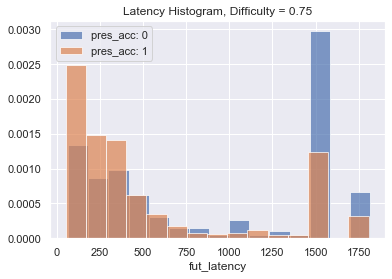

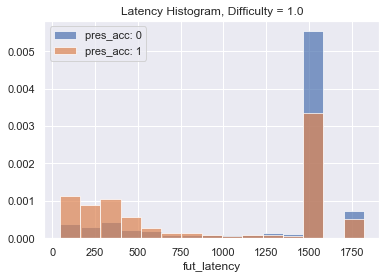

In [73]:
sns.set()

for i in np.arange(0, 1.25, 0.25):
    f = {"fut_difficulty": i}
    histograms(train, "fut_latency", by= "pres_acc", filter_ = f, title = "Latency Histogram, Difficulty = %s"%i)